In [1]:
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

In [2]:
wifesAge = 'Wifes age'
wifesEducation = 'Wifes education'
husbandsEducation = 'Husbands education '
childrenBorn = 'Number of children ever born'
wifesReligion = 'Wifes religion'
wifeIsWorking = 'Wifes now working?'
husbandsOcupation = 'Husbands occupation'
standardOfLiving = 'Standard-of-living index'
mediaExposure = 'Media exposure'
contraceptiveMethod = 'Contraceptive method used'

colNames= [
    wifesAge, 
    wifesEducation, 
    husbandsEducation, 
    childrenBorn, 
    wifesReligion, 
    wifeIsWorking, 
    husbandsOcupation, 
    standardOfLiving, 
    mediaExposure, 
    contraceptiveMethod,
    ]

#Retrieved data from: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice
dataFrame = pd.read_table('./cmc.data', sep=',', names=colNames)

def castToCategoricalColumns(columns, dataSet):
  for i in columns:
    dataSet[i] = pd.Categorical(dataSet[i])

def plotCategoricalVariables(columns:list, dataSet: pd.DataFrame):
  for i in columns:
    values = dataSet[i].unique();
    plt.figure(f'values in {i} column', figsize=(8,3))
    sns.countplot(data = dataSet, x = i)

def setCategoricalLabels(columns, dataSet, labels)->None:
  for i in columns:
    dataSet[i] = dataSet[i].replace(labels[i][0], labels[i][1])

categoryFactors = {
    wifesEducation:[
      [1, 2, 3, 4]
    , [
        'low',
        'medium-low',
        'medium-high',
        'high',
    ]], 
    husbandsEducation:[
      [1, 2, 3, 4]
    , [
        'low',
        'medium-low',
        'medium-high',
        'high',
    ]],  
    wifesReligion:[
      [0, 1]
    , [
        'Non islam',
        'Islam',
    ]], 
    wifeIsWorking:[
      [0, 1]
    , [
        'Yes',
        'No',
    ]], 
    husbandsOcupation:[
      [1, 2, 3, 4]
    , [
        'Professional, technical and clerical',
        'Sales, services',
        'Manual',
        'Agriculture',
    ]], 
    standardOfLiving:[
      [1, 2, 3, 4]
    , [
        'low',
        'medium-low',
        'medium-high',
        'high',
    ]], 
    mediaExposure:[
      [0, 1]
    , [
        'Good',
        'Not good',
    ]], 
    contraceptiveMethod:[
      [1, 2, 3]
    , [
        'No use',
        'Long term',
        'Short term',
    ]],
}

In [7]:
categoricalVariables = [wifesEducation, husbandsEducation, wifesReligion, wifeIsWorking, husbandsOcupation, standardOfLiving, mediaExposure]
numericalVariables = [wifesAge, childrenBorn]
target = contraceptiveMethod

setCategoricalLabels([*categoricalVariables, target], dataFrame, categoryFactors)

#plotCategoricalVariables([*categoricalVariables, target], dataFrame)


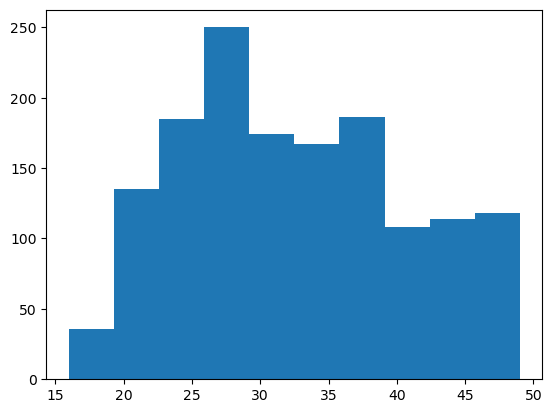

32.53835709436524


In [14]:
def showContinousVariableDescription(data, column):
  plt.hist(data[column])
  plt.show()
  print(data[column].mean())

showContinousVariableDescription(dataFrame, wifesAge)

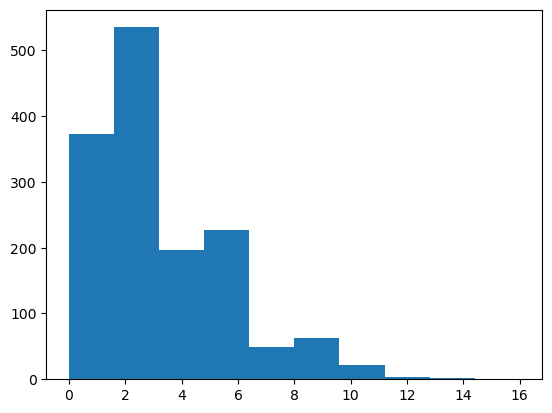

3.2613713509843856


In [15]:


showContinousVariableDescription(dataFrame, childrenBorn)

In [ ]:
pd.crosstab(dataFrame[wifesEducation], dataFrame[contraceptiveMethod])

In [ ]:
pd.crosstab(dataFrame[contraceptiveMethod], dataFrame[wifesEducation])

In [ ]:
pd.crosstab(dataFrame[contraceptiveMethod], dataFrame[husbandsEducation])

In [ ]:
pd.crosstab(dataFrame[contraceptiveMethod], [dataFrame[husbandsEducation], dataFrame[wifesEducation]])

In [12]:
noUseGroup = dataFrame.loc[dataFrame[contraceptiveMethod] == 'No use'].copy()

shortTermGroup = dataFrame.loc[dataFrame[contraceptiveMethod] == 'Short term'].copy()

longTermGroup = dataFrame.loc[dataFrame[contraceptiveMethod] == 'Long term'].copy()

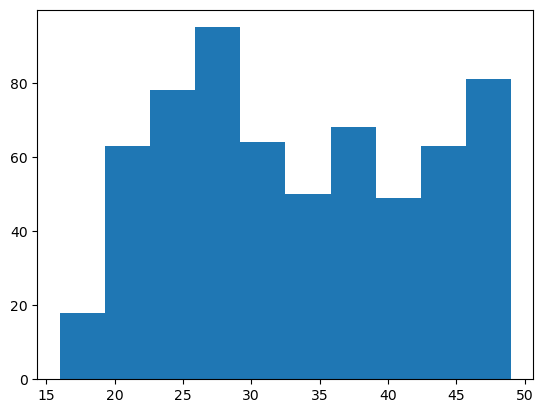

33.42448330683625


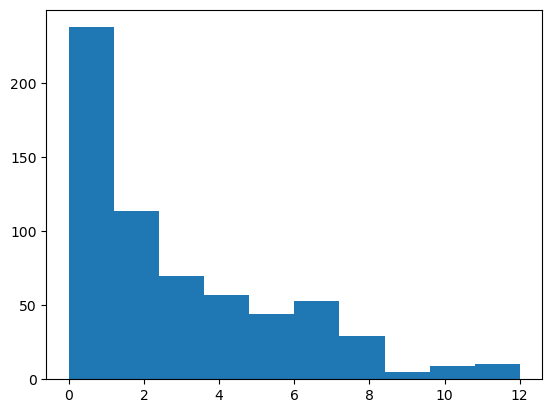

2.934817170111288


In [16]:
showContinousVariableDescription(noUseGroup, wifesAge)
showContinousVariableDescription(noUseGroup, childrenBorn)

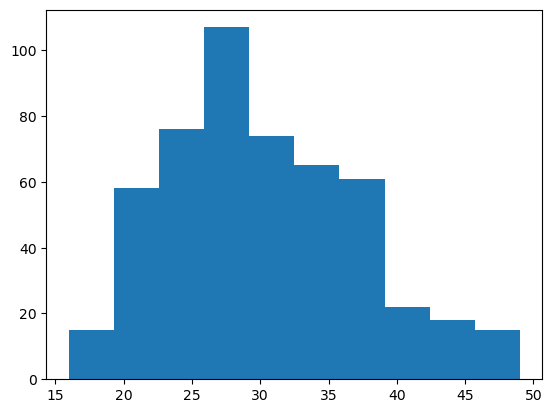

30.244618395303327


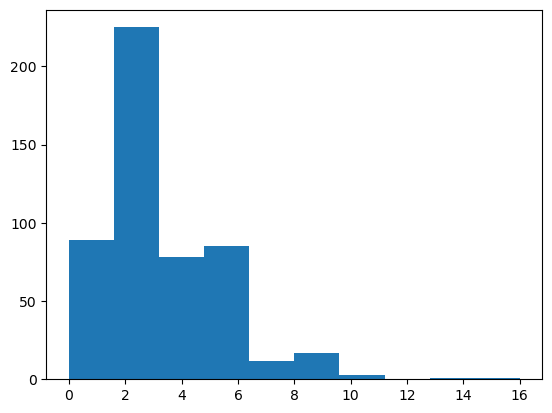

3.352250489236791


In [18]:
showContinousVariableDescription(shortTermGroup, wifesAge)
showContinousVariableDescription(shortTermGroup, childrenBorn)

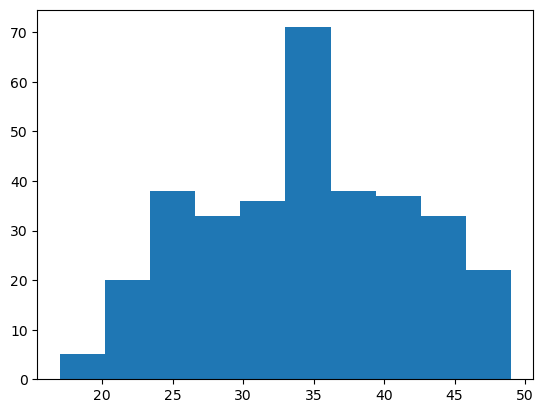

34.38438438438438


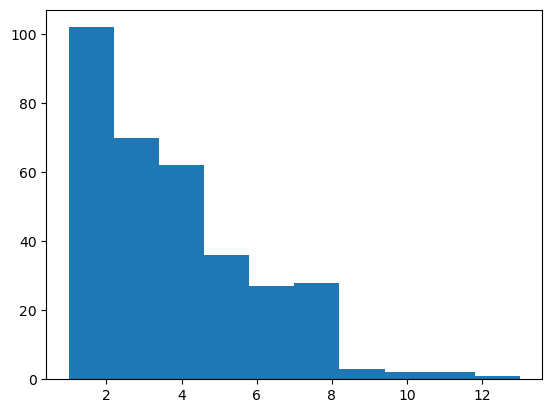

3.7387387387387387


In [17]:
showContinousVariableDescription(longTermGroup, wifesAge)
showContinousVariableDescription(longTermGroup, childrenBorn)

In [5]:
dataFrame.groupby(contraceptiveMethod).size()

Contraceptive method used
1    629
2    333
3    511
dtype: int64

In [ ]:
dataFrame.groupby(contraceptiveMethod).agg(['mean', 'std'])

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in categoricalVariables:
    if ix <= 3:
        if c != childrenBorn:
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = dataFrame, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=dataFrame, x=c, y=childrenBorn, ax=ax2)
            sns.violinplot(data=dataFrame, x=c, y=childrenBorn, ax=ax2)
            sns.swarmplot(data = dataFrame, x=c, y =childrenBorn, color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.boxplot(x=contraceptiveMethod, y=childrenBorn, data=dataFrame, ax=ax)
sns.swarmplot(x=contraceptiveMethod, y=childrenBorn, data=dataFrame, color='black', alpha = 0.5, ax=ax, s=2.5);

In [ ]:
#Borrar todos los outliers de childrenBorn. dfNCBO = data frame No Children Outliers Born

dfNCBO = dataFrame.loc[dataFrame[childrenBorn] <= 8].copy()


In [ ]:
#Check the different regression shapes for distinct distributions
#https://www.analyticsvidhya.com/blog/2021/09/q-q-plot-ensure-your-ml-model-is-based-on-the-right-distributions/

fig, axs = plt.subplots(2, 2, figsize=(8, 7))
pg.qqplot(dataFrame.loc[dataFrame[contraceptiveMethod]=='No use', childrenBorn], dist='norm', ax=axs[0,0])
axs[0,0].set_title('No use')
pg.qqplot(dataFrame.loc[dataFrame[contraceptiveMethod]=='Short term', childrenBorn], dist='norm', ax=axs[0,1])
axs[0,1].set_title('Short term')
pg.qqplot(dataFrame.loc[dataFrame[contraceptiveMethod]=='Long term', childrenBorn], dist='norm', ax=axs[1,0])
axs[1,0].set_title('Long term')
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 7))
pg.qqplot(dfNCBO.loc[dfNCBO[contraceptiveMethod]=='No use', childrenBorn], ax=axs[0,0])
axs[0,0].set_title('No use')
pg.qqplot(dfNCBO.loc[dfNCBO[contraceptiveMethod]=='Short term', childrenBorn], ax=axs[0,1])
axs[0,1].set_title('Short term')
pg.qqplot(dfNCBO.loc[dfNCBO[contraceptiveMethod]=='Long term', childrenBorn], ax=axs[1,0])
axs[1,0].set_title('Long term')
plt.tight_layout()

In [ ]:
pg.normality(data=dataFrame, dv=childrenBorn, group=contraceptiveMethod)

In [ ]:
pg.normality(data=dfNCBO, dv=childrenBorn, group=contraceptiveMethod)

In [ ]:
pg.homoscedasticity(data=dataFrame, dv=childrenBorn, group=contraceptiveMethod, method='levene')

In [ ]:
pg.homoscedasticity(data=dfNCBO, dv=childrenBorn, group=contraceptiveMethod, method='levene')

In [ ]:
pg.anova(data=dataFrame, dv=childrenBorn, between=contraceptiveMethod, detailed=True)

In [ ]:
pg.anova(data=dfNCBO, dv=childrenBorn, between=contraceptiveMethod, detailed=True)